In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.impute import SimpleImputer
import math
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline



# imputer = SimpleImputer(strategy='mean')
# data[['Open', 'High', 'Low', 'Volume']] = imputer.fit_transform(data[['Open', 'High', 'Low', 'Volume']])
# data[['Close', 'Adj Close']] = imputer.fit_transform(data[['Close', 'Adj Close']])
# data.plot(x='Date', y='Close')
# plt.xlabel("Date")
# plt.ylabel("Close")
# plt.xticks(rotation = 45)
# print(data.isnull().sum())
# data.plot(x='Date', y='Close')
# plt.xlabel("Date")
# plt.ylabel("Close")
# plt.xticks(rotation = 45)
# 
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 1)
#
# from sklearn.metrics import r2_score
# print(f"Accuracy:{r2_score(y_test,y_pred)}")



In [3]:
data  = pd.read_csv('MaunaLoaDailyTemps.csv')

In [4]:
data.describe()

,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
count,1821.000000,1821.000000,1821.000000,1825.000000,1825.000000
mean,38.637013,54.515102,46.818781,607.074521,1823.002740
std,3.798284,5.013654,4.143192,40.797585,49.555065
min,22.000000,36.000000,31.000000,543.000000,1742.000000
25%,36.000000,52.000000,44.000000,557.000000,1802.000000
50%,39.000000,55.000000,47.000000,614.000000,1831.000000
75%,41.000000,58.000000,50.000000,640.000000,1851.000000
max,49.000000,67.000000,57.000000,700.000000,1905.000000


In [5]:
print(data.isnull().sum())

DATE       0
MinTemp    4
MaxTemp    4
AvgTemp    4
Sunrise    0
Sunset     0
dtype: int64


In [6]:
 imputer = SimpleImputer(strategy='mean')
data[['MinTemp','MaxTemp','Sunrise','Sunset']] = imputer.fit_transform(data[['MinTemp','MaxTemp','Sunrise','Sunset']])
data[['AvgTemp']] = imputer.fit_transform(data[['AvgTemp']])

In [7]:
print(data.isnull().sum())

DATE       0
MinTemp    0
MaxTemp    0
AvgTemp    0
Sunrise    0
Sunset     0
dtype: int64


(array([-250.,    0.,  250.,  500.,  750., 1000., 1250., 1500., 1750.,
        2000.]),
 [Text(-250.0, 0, '4/25/2018'),
  Text(0.0, 0, '1/1/2014'),
  Text(250.0, 0, '9/8/2014'),
  Text(500.0, 0, '5/16/2015'),
  Text(750.0, 0, '1/21/2016'),
  Text(1000.0, 0, '9/27/2016'),
  Text(1250.0, 0, '6/4/2017'),
  Text(1500.0, 0, '2/9/2018'),
  Text(1750.0, 0, '10/17/2018'),
  Text(2000.0, 0, '')])

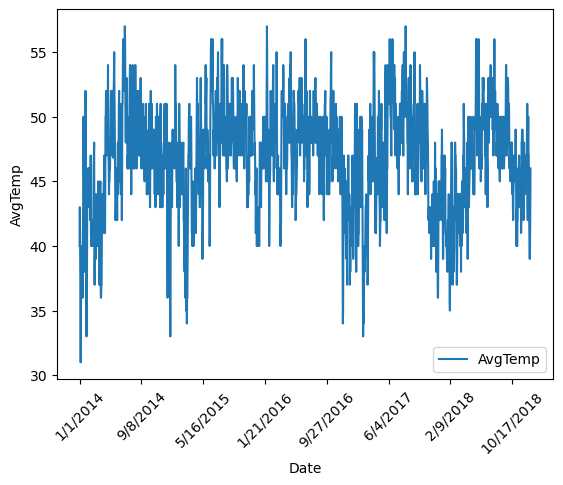

In [8]:
data.plot(x='DATE', y='AvgTemp')
plt.xlabel("Date")
plt.ylabel("AvgTemp")
plt.xticks(rotation = 45)

In [9]:
X = data[['MinTemp','MaxTemp','Sunrise','Sunset']].values
y = data['AvgTemp'].values

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size = 0.2,random_state = 1)

In [17]:
 from sklearn.svm import SVR

#svr = SVR()
svr = SVR(C=0.015)
#svr = SVR(kernel='linear')
svr.fit(X_train, y_train)
svr.fit(X_train,y_train)
y_pred = svr.predict(X_test)
y_train_pred = svr.predict(X_train)
svr.predict(X)

array([46.86549216, 46.86549216, 46.86549216, ..., 46.86549216,
       46.86549216, 46.86549216])

In [18]:
from sklearn.metrics import r2_score
print(f"Accuracy:{r2_score(y_test,y_pred)}")

Accuracy:0.5953680776629854


In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = math.sqrt(mse)
correlation = np.corrcoef(y_test, y_pred)[0, 1]
mean_actual = np.mean(y_test)
mean_predicted = np.mean(y_pred)

In [20]:
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"r2_score:{r2_score(y_test,y_pred)}")
print(f"Correlation between Actual and Predicted: {correlation}")
print(f"Mean of Actual Values: {mean_actual}")
print(f"Mean of Predicted Values: {mean_predicted}")

MSE: 7.15230449305667
MAE: 1.6463967571123828
RMSE: 2.6743792724773856
r2_score:0.5953680776629854
Correlation between Actual and Predicted: 0.8863398862619941
Mean of Actual Values: 46.67621583805376
Mean of Predicted Values: 46.97578067323445


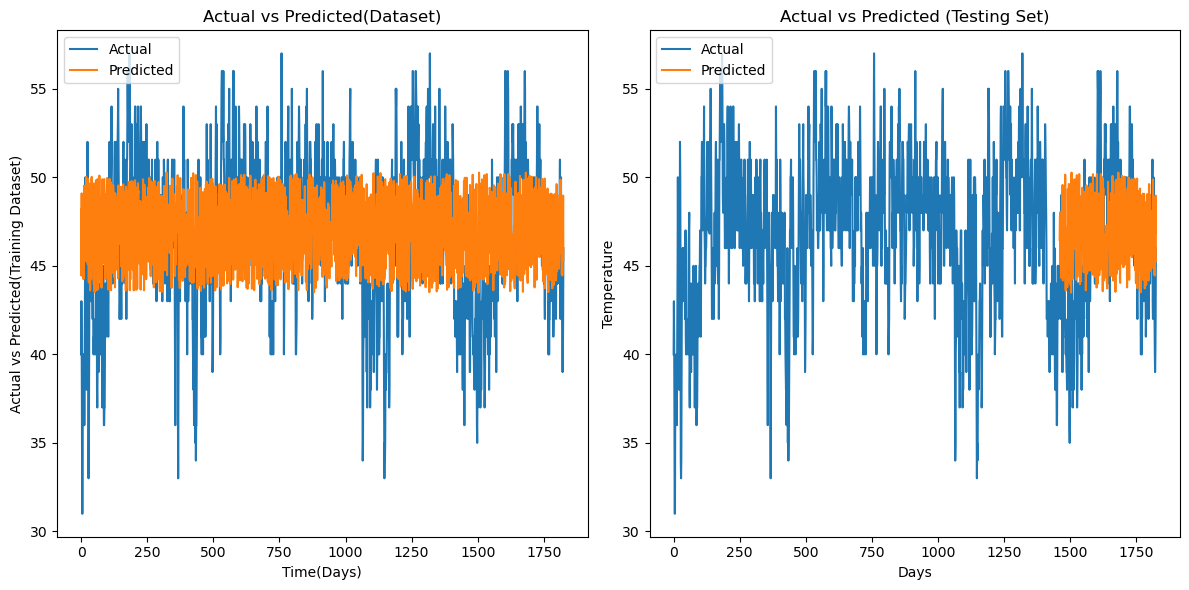

In [31]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(y, label="Actual")
plt.plot(np.concatenate([y_train_pred,y_pred]), label="Predicted")
plt.xlabel("Time(Days)")
plt.ylabel("Actual vs Predicted(Training Dataset)")
plt.title(r"Actual vs Predicted(Dataset)")
plt.legend(loc='upper left')  # This will add the legend to your plots
# # plt.tight_layout()
# # plt.show()
# Plotting the actual vs predicted values for testing set
# plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(y, label='Actual')
plt.plot([None for _ in y_train_pred] + [x for x in y_pred], label='Predicted')
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Days')
plt.ylabel('Temperature')

plt.legend(loc='upper left')  # This will add the legend to your plots
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(np.concatenate((y_train, y_test)), label='Actual')
plt.plot([x for x in y_train_pred]+[x for x in y_pred], label='Predicted')
plt.xlabel("Time(Days)")
plt.ylabel("Stock Price)")
plt.title(r"Actual vs Predicted(Dataset)")
plt.legend(loc='upper left')  # This will add the legend to your plots
# # plt.tight_layout()
# # plt.show()
# Plotting the actual vs predicted values for testing set
# plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(np.concatenate((y_train, y_test)), label='Actual')
plt.plot([x for x in y_train_pred]+[x for x in y_pred], label='Predicted')
plt.title('Actual vs Predicted (Testing Set)')
plt.xlabel('Days')
plt.ylabel('Stock Price')

plt.legend(loc='upper left')  # This will add the legend to your plots
plt.tight_layout()
plt.show()